# Exploring Time-to-Flight's Influence on Airfare Costs in India's Metropolises

# **Permissions**

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

- [ ] YES - make available
- [X] NO - keep private

# Names

- Zirui Lin
- Xinhao Zhao
- Duye Liu
- Yuancheng Cao
- Xinye Guo
- Zhexi Gu

# Overview

The air travel industry is subject to dynamic pricing, where flight ticket prices fluctuate based on various factors, including demand, seasonality, airline company, and time of booking. Understanding the relationship between the date of booking before departure and flight ticket prices is crucial for travelers to optimize their flight booking experience and potentially save costs. This research aims to analyze the dataset from "Ease My Trip" website to investigate whether flight ticket prices have a correlation with the proximity of the booking date to the departure date. The Kruskal-Wallis H test found that Airline and Flight have significant impacts on price variation, but the proximity of the booking date to the departure date does not have a significant effect on ticket price. In this project, we embarked on a journey to construct a predictive model for airfare costs based on a range of pertinent factors. We initially utilized Ridge Regression as our base model, achieving a respectable R^2 score of 0.90 but suffering from larger Mean Absolute Error (MAE) and Mean Squared Error (MSE) values. Upon exploration of hyperparameter tuning with GridSearchCV, we found similar results to our base model. The breakthrough came when we employed a Random Forest Regression model, which led to a noticeable reduction in MAE and MSE and an increased R^2 score of 0.92, revealing its superior predictive power for this particular dataset.

# **Research Question**

In the context of airfare transactions recorded on Easemytrip for flights between six major metropolitan cities in India, how does the temporal gap between the date of booking and the departure date influence the cost of airfare? Specifically, is there a positive or negative correlation between the time of booking and the price of airfare?




# **Background and Prior Work**

**Background:**

The cost of airfare is a critical factor for travelers when planning their journeys. In the Indian context, with the rise of online booking platforms like "Ease My Trip", understanding the dynamics of airfare pricing has become increasingly important for consumers. The pricing of airfares is influenced by a multitude of factors, including the time of booking relative to the departure date, the destination, time of year, and day of the week[^Sarao2022].

In the Indian aviation market, six metropolitan cities - Mumbai, Delhi, Bangalore, Hyderabad, Chennai, and Kolkata - serve as major hubs for domestic and international travel. The airfare between these cities can vary significantly based on the factors mentioned above[^Sarao2022]. In order to help consumers understand the factors that really influence flight prices so they don't waste their money and make more appropriate travel plans, we started this data analysis of flight prices.

The dataset under scrutiny in this study is extracted from the "Ease My Trip" website, a popular online flight booking platform. This dataset encompasses 300,261 individual flight booking options, compiled over a span of 50 days from February 11th to March 31st, 2022[^Sarao2022]. The dataset was constructed using the Octoparse scraping tool and is divided into two categories: economy class tickets and business class tickets[^Sarao2022]. The data points were collected for flight travel between India's top 6 metropolitan cities, leading to a vast and diverse dataset[^Sarao2022]. With 11 different features included in this dataset, a comprehensive understanding of the factors influencing flight booking can be ascertained[^Sarao2022].

In the research field, several papers have been published that employ machine learning algorithms to analyze flight fare datasets for prediction purposes. Sarao, Parwaz, and Samanta, Pushpendu's work titled "Flight Fare Prediction Using Machine Learning" leverages machine learning techniques to project dynamic flight pricing[^Sarao2022]. They suggest that the accuracy of their models could be improved by incorporating additional data, such as current seat availability[^Sarao2022]. Additionally, another paper discusses the application of eight different machine learning models to predict airfare prices[^Tziridis2017]. They focus on identifying the feature set that most significantly influences the accuracy of their predictions[^Tziridis2017]. To support their research, they used a novel dataset consisting of 1,814 flights from Aegean Airlines, achieving an accuracy rate of almost 88% in their price predictions[^Tziridis2017]. This research indicates the promising potential of using machine learning algorithms for flight fare prediction[^Tziridis2017].

**References**:

1: Sarao, Parwaz and Samanta, Pushpendu, Flight Fare Prediction Using Machine Learning (October 20, 2022). Available at SSRN: http://dx.doi.org/10.2139/ssrn.4269263

2: K. Tziridis, T. Kalampokas, G. A. Papakostas and K. I. Diamantaras, "Airfare prices prediction using machine learning techniques," 2017 25th European Signal Processing Conference (EUSIPCO), Kos, Greece, 2017, pp. 1036-1039, doi: 10.23919/EUSIPCO.2017.8081365.

# Hypothesis


1. **Research hypothesis**:
The proximity of the booking date to the departure date has a significant effect on the price of the flight ticket; specifically, later bookings (closer to the departure date) are associated with higher prices.
2. **Null hypothesis**:The proximity of the booking date to the departure date does not have a significant effect on the price of the flight ticket; specifically, the timing of bookings does not influence ticket prices.





# **Dataset(s)**

- **Dataset Name**: Flight Price Prediction
- **Link to the dataset**: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?resource=download
- **Number of observations**: 300153
- **Description**: The "Flight Price Prediction" dataset, sourced from Easemytrip, captures comprehensive booking data for flights traversing between India's top six metro cities. Each entry outlines key details such as the airline company, source and destination cities, number of stops, class of travel, flight duration, days until the flight, arrival time, and price. This dataset serves as a valuable resource for forecasting flight prices, studying market trends, and conducting comparative analyses across various airlines.

# **Setup**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as stat
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Data Cleaning**

In [ ]:
path = "Clean_Dataset.csv"
data = pd.read_csv(path)

In [ ]:
# show a few rows of dataset
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#remove NaN values
data = data.dropna()

#remove duplicates
data = data.drop_duplicates()

By removing NaN values with `dropna()`, we're ensuring that our dataset only contains complete records. Duplicate rows can skew our analysis, as they over-represent certain data points. Removing them ensures every record in our dataset is unique, providing a fair representation of the data.

In [ ]:
#drop unwanted column
data = data.drop(columns = ["Unnamed: 0"])

The "Unnamed: 0" column is likely a byproduct of saving and loading the data. When data is saved to a file format like CSV and then read back into a DataFrame, the index is often saved as a separate column. When the data is loaded again, a new index is created automatically, resulting in an "Unnamed: 0" column. This column doesn't contain any relevant or useful information; it simply duplicates the DataFrame's index. Since this column doesn't add any value and can be confusing or misleading when analyzing the data, it's common practice to drop it. In addition, maintaining a clean dataset by removing unnecessary columns helps improve readability, reduces memory usage, and can improve processing speed.

In [ ]:
# show a few rows of dataset after drop unwanted column
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# know the datatypes of each column
data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [ ]:
# know size of dataset
data.shape

(300153, 11)

In [ ]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Data Exploration

First, we explore the basic statisitcs of the data by finding the central tendency and variability.

In [ ]:
numerical = ['duration','price']
catagorical = ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class','days_left']

print("\033[1m" + "Numerical Variables" + "\033[0m")
for i in numerical:
    mean = stat.mean(data[i])
    median = stat.median(data[i])
    mode = stat.mode(data[i])
    variance = stat.variance(data[i])
    std = stat.stdev(data[i])
    print("variable:", i," mean:",mean, " median:",median," mode:",mode," variance:",variance," std:",std )

print("")
print("\033[1m" + "Categorical Variables" + "\033[0m")
for j in catagorical:
    median = stat.median(data[j])
    mode = stat.mode(data[j])
    print("variable:", j, " median:",median," mode:",mode)



Numerical Variables
variable: duration  mean: 12.221020812718846  median: 11.25  mode: 2.17  variance: 51.724824273111565  std: 7.191997238119017
variable: price  mean: 20889.660523133203  median: 7425  mode: 54608  variance: 515188643.40443504  std: 22697.767366074466

Categorical Variables
variable: airline  median: Indigo  mode: Vistara
variable: flight  median: I5-1561  mode: UK-706
variable: source_city  median: Delhi  mode: Delhi
variable: departure_time  median: Evening  mode: Morning
variable: stops  median: one  mode: one
variable: arrival_time  median: Morning  mode: Night
variable: destination_city  median: Hyderabad  mode: Mumbai
variable: class  median: Economy  mode: Economy
variable: days_left  median: 26  mode: 25


- For the duration of flights, the average is approximately 12.22 hours with a median of 11.25 hours. The most frequent duration is 2.17 hours. The standard deviation of 7.19 indicates a wide spread around the mean.
- The average flight price is around 20,889.66 units, with a median price of 7425 units, indicating that the distribution of prices is skewed to the right. The most common price is significantly high at 54,608 units.
- Among airlines, Vistara is the most frequent with Indigo being the median airline. Similarly, Delhi is the most common source city and also the median in terms of ordering.
- The flights are most commonly departing in the morning and arriving at night. However, the median flight departs in the evening and arrives in the morning.
- The median and mode values for 'stops' are 'one', which means most flights have one stop. The median destination city is Hyderabad, but Mumbai is the most frequently visited city. Most flights are in Economy class and there are usually 25 or 26 days left before the flight.

In [ ]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


- The dataset consists of 300,153 records. On average, the duration of a flight is around 12.22 hours, tickets are usually bought around 26 days in advance, and the average ticket price is approximately 20,890 units.
- The flight durations vary greatly, ranging from a minimum of 0.83 hours to a maximum of 49.83 hours, with a standard deviation of 7.19 hours. Similarly, the days left for a flight when the ticket is bought range from 1 to 49, with a standard deviation of around 13.56 days.
- The ticket prices also show a significant range, from 1,105 units up to 123,071 units, with a high standard deviation of 22,697 units, indicating a large variability in prices. The 25th, 50th, and 75th percentiles of the ticket prices are 4,783 units, 7,425 units, and 42,521 units respectively, suggesting that a significant number of tickets are purchased at higher prices.

# **Data Visualization**

For data visualization, we use different visualization schemes for different data types.
  * **Numeric variables**: we will understand the distribution of these variables by plotting histograms.
  * **Categorical variables**: we will understand the frequency of each category by plotting a histogram.
  * **Price distribution**: we will use box plots to understand the distribution of prices for each airline.

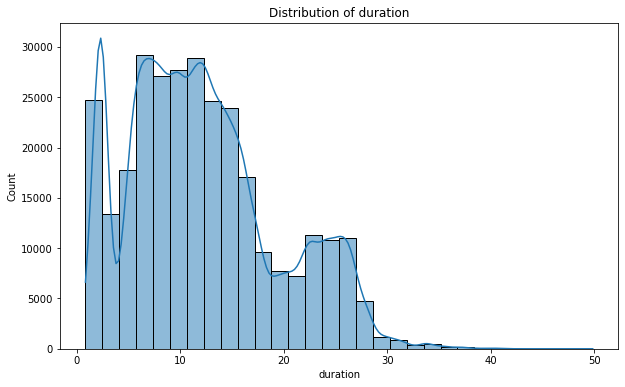

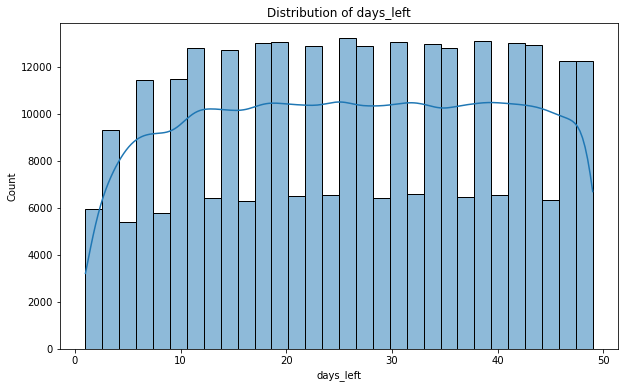

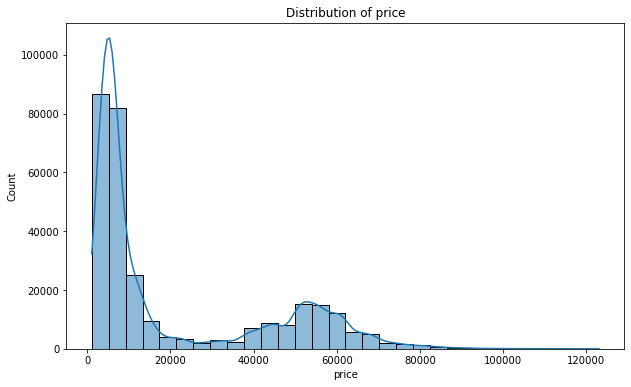

In [ ]:
# Numerical variables: 'duration', 'days_left', 'price'
num_vars = ['duration', 'days_left', 'price']

# Categorical variables: 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'
cat_vars = ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class']

# Histograms for numerical variables
for var in num_vars:
    plt.figure(figsize=(10,6))
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

- The distributions of both duration and price exhibit right skewness, implying that most flights have shorter durations and lower prices, with fewer flights being longer and more expensive.
- The distribution of "days left" shows multiple modes, which suggests that certain specific numbers of days left until the flight are more common than others, likely reflecting trends in when people tend to book flights.


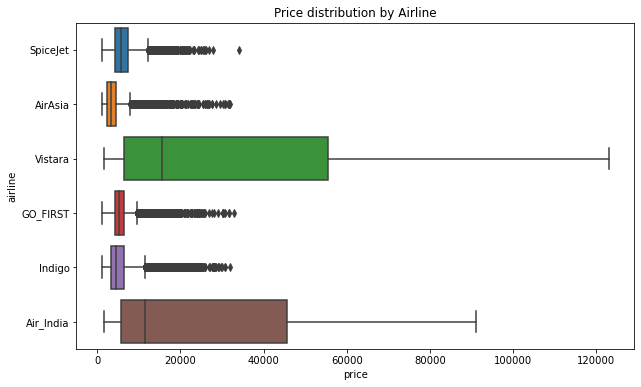

In [ ]:
# Box plot for price by each airline
plt.figure(figsize=(10,6))
sns.boxplot(y='airline', x='price', data=data)
plt.title('Price distribution by Airline')
plt.show()

In [ ]:
data.groupby('airline')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
AirAsia,16098.0,4091.072742,2824.055172,1105.0,2361.0,3276.0,4589.0,31917.0
Air_India,80892.0,23507.019112,20905.116909,1526.0,5623.0,11520.0,45693.0,90970.0
GO_FIRST,23173.0,5652.007595,2513.865560,1105.0,4205.0,5336.0,6324.0,32803.0
Indigo,43120.0,5324.216303,3268.894831,1105.0,3219.0,4453.0,6489.0,31952.0
SpiceJet,9011.0,6179.278881,2999.630406,1106.0,4197.0,5654.0,7412.0,34158.0
Vistara,127859.0,30396.536302,25637.159445,1714.0,6412.0,15543.0,55377.0,123071.0


In the given boxplot statistics of six airlines, the key components such as the minimum, maximum, and three quartiles (25%, 50%, and 75%) are provided, along with the count, mean, and standard deviation. The first airline, AirAsia, has a range from 1,105 to 31,917 with the median at 3,276, hinting at a positive skew as the mean is 4,091. The large standard deviation of 2,824 suggests substantial variation in the data. In contrast, Air India, with the highest count, shows the most significant spread, ranging from 1,526 to 90,970, and a high standard deviation of 20,905. The mean (23,507) considerably exceeds the median (11,520), suggesting a heavy tail on the right side, indicative of extreme values or outliers. GO_FIRST and Indigo have similar spreads, but the latter has a higher mean and standard deviation. This might suggest that Indigo's fares are more dispersed and generally more expensive. SpiceJet, with the smallest count, shows a higher median (5,654) than the other low-count airlines, indicating that even the middle fare is relatively high. Finally, Vistara, despite having the largest count, exhibits the highest mean and a broad range from 1,714 to 123,071, with a very high standard deviation. This demonstrates a large variation in Vistara's fares, which can be associated with both low-cost and premium services.

## **Descriptive Statistics**

We performed more detailed descriptive statistics on the data in a number of ways, the main purpose of which was to disentangle the characteristics of each variable in the data in more detail and to make initial judgments about their degree of correlation

### **Frequency Distribution**



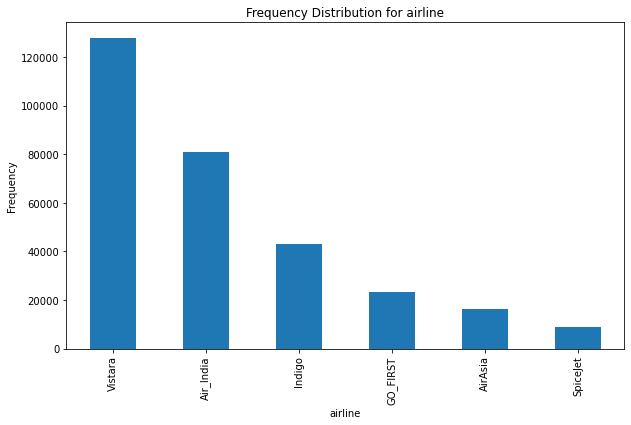

<Figure size 720x432 with 0 Axes>

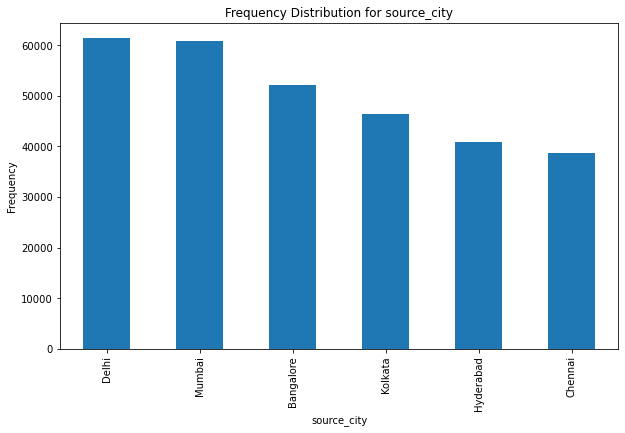

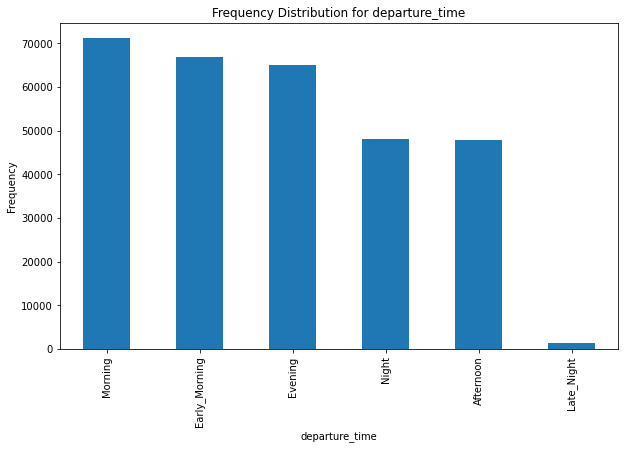

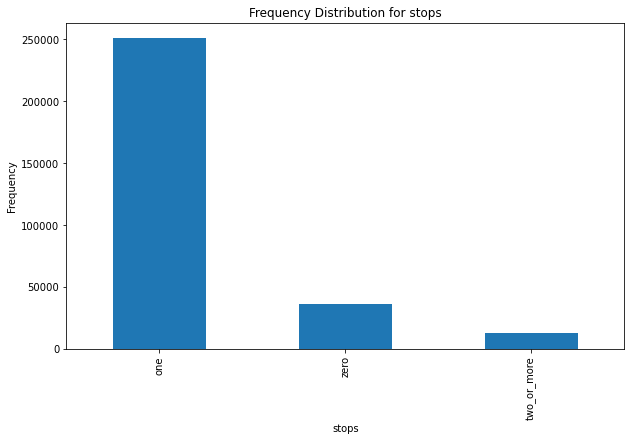

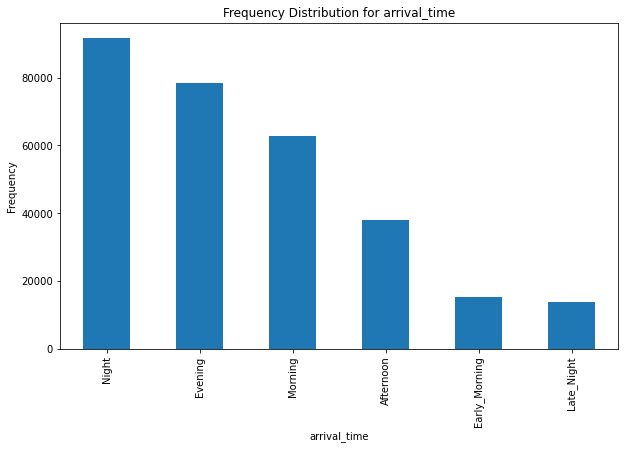

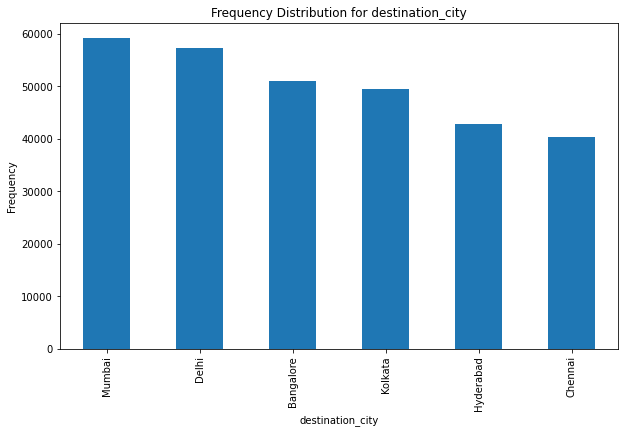

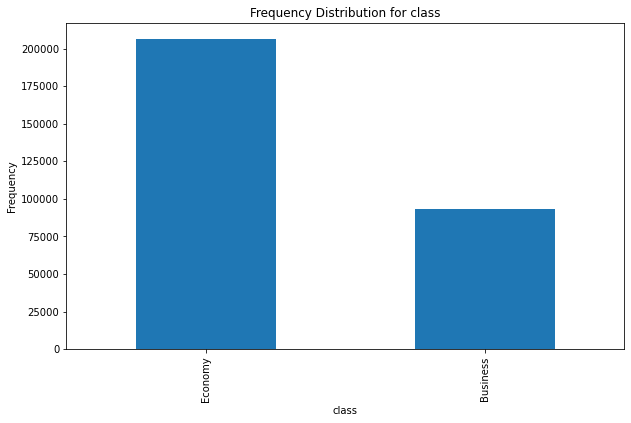

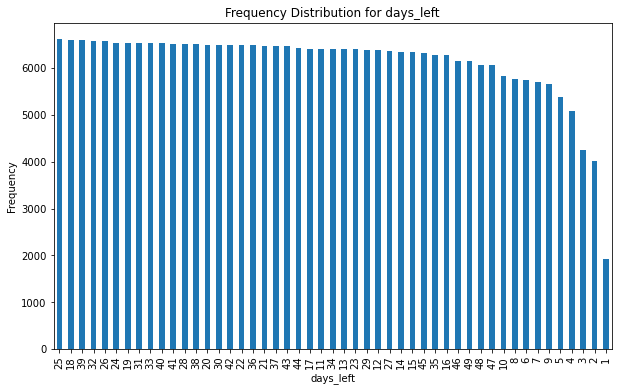

In [ ]:
catagorical = ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class','days_left']

# Frequency distributions calculated for each categorical variable

for var in catagorical:
    plt.figure(figsize=(10, 6))

    if var != 'flight':
        data[var].value_counts().plot(kind='bar')
        plt.title(f'Frequency Distribution for {var}')
        plt.ylabel('Frequency')
        plt.xlabel(var)

    plt.show()


The results demonstrate the frequency distribution of each categorical variable. Below is the explanation of each variable:

1. **airline**: Vistara Airlines has the most flights, accounting for 127,859 samples, followed by Air India and Indigo. the least number of flights is SpiceJet Airlines with only 9,011 samples.

2. **flight**: Flight number UK-706 has the highest number of flights with 3235 samples. Flight number G8-107 has only one sample.

3. **source_city**: Delhi has the highest number of samples, with a total of 61,343 samples, while Chennai has the lowest number of samples, with only 38,700 samples.

4. **departure_time**: Most of the flights depart in the morning and early morning, while the least number of flights depart late at night.

5. **stops**: Most flights have one stop, and only a few have two or more stops.

6. **arrival_time**: Most flights arrive at their destination at night, with a few arriving in the early morning.

7. **destination_city**: Most of the flights had a destination in Mumbai, a few had a destination in Chennai.

8. **class**: Economy class flights have the largest number of samples, with 206,666 samples, while business class flights have a relatively small number of samples, with only 93,487 samples.

9. **days_left**: The number of days remaining between the scheduled flight and the actual departure date is relatively evenly distributed, with the largest number of samples for flights with 25 days remaining at 6,633 samples and the smallest number of samples for flights with 1 day remaining at 1,927 samples.

The above results provide the distribution of each variable, which is very helpful for further exploratory data analysis and modeling.

### **Preliminary Correlation Calculations**

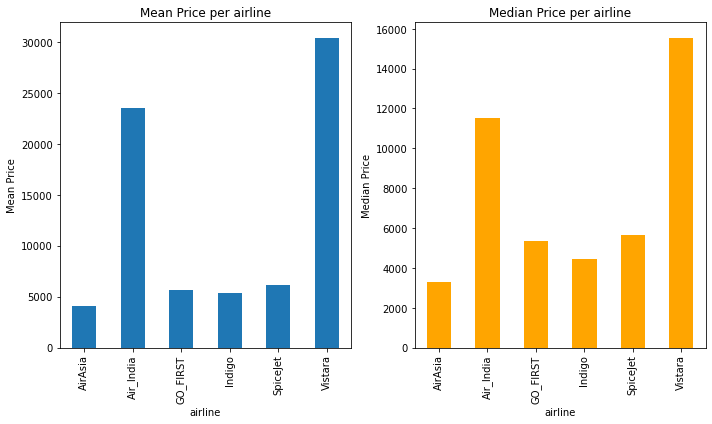

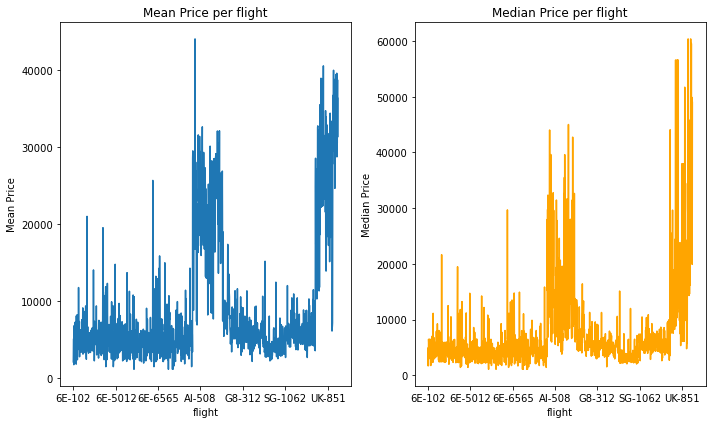

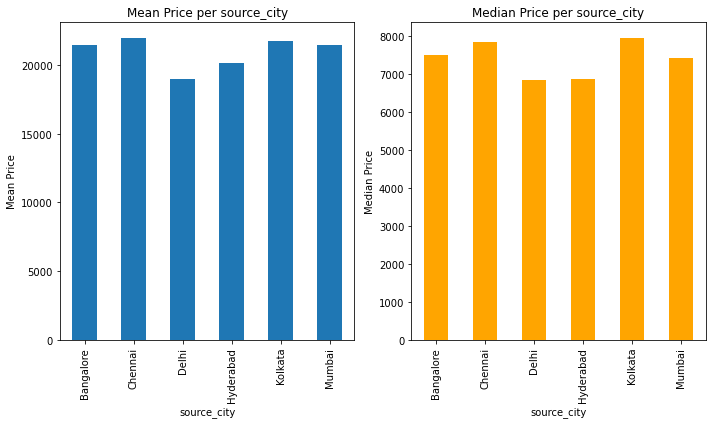

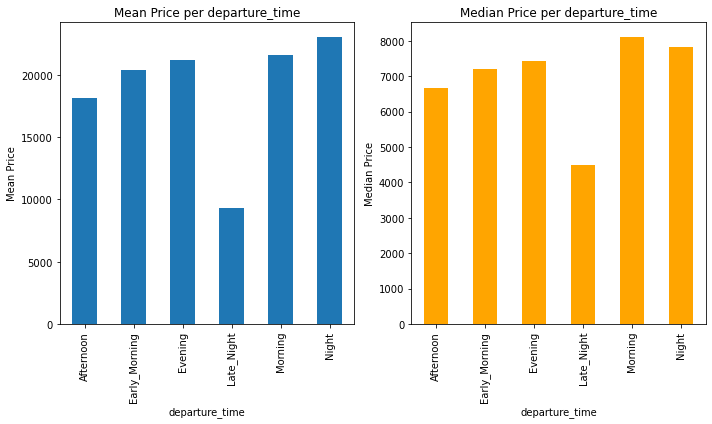

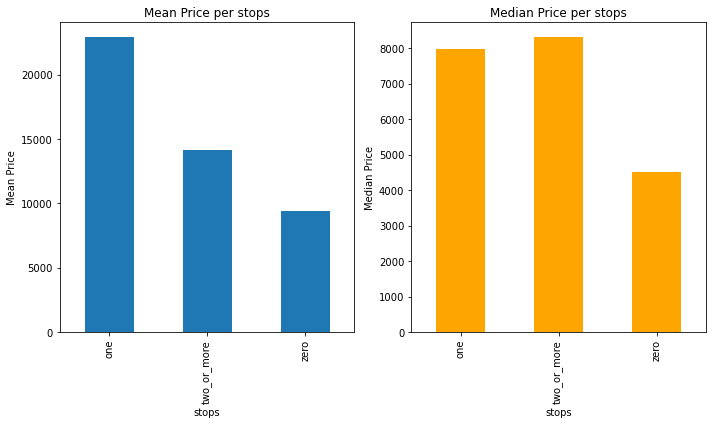

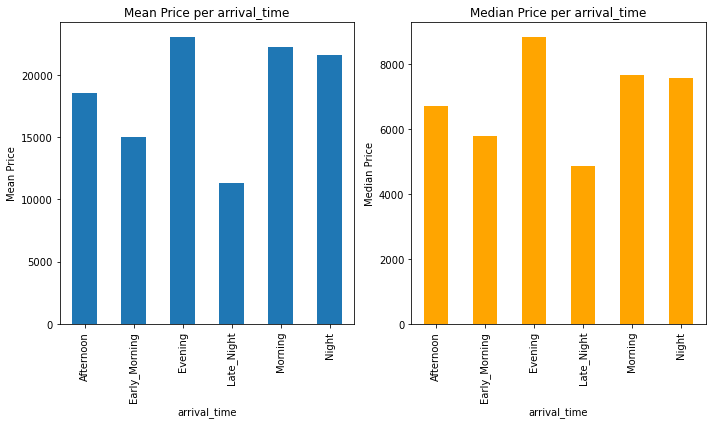

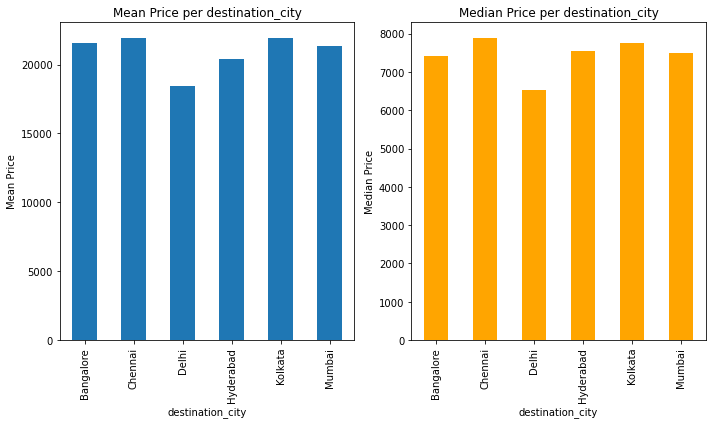

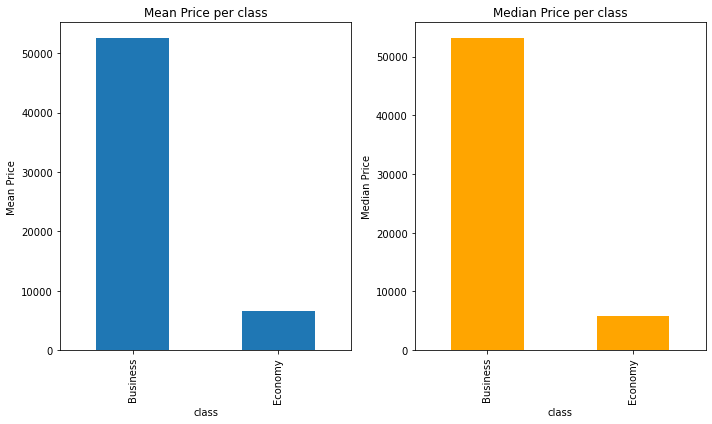

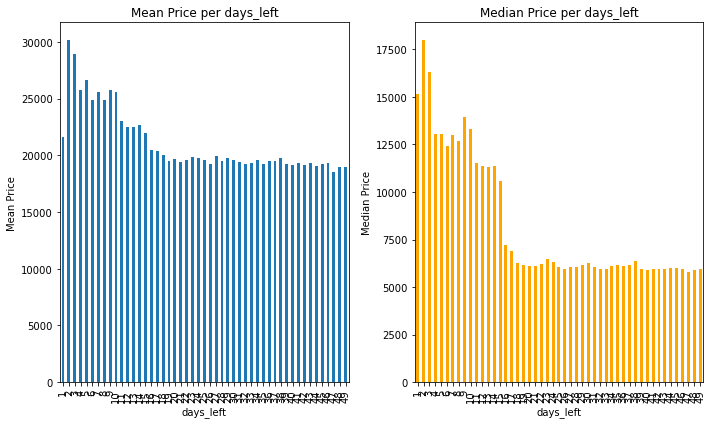

In [ ]:
for var in catagorical:
    mean_price = data.groupby(var)['price'].mean()
    median_price = data.groupby(var)['price'].median()

    # visualization
    plt.figure(figsize=(10, 6))

    if var != 'flight':
        plt.subplot(1, 2, 1)
        mean_price.plot(kind='bar')
        plt.title(f'Mean Price per {var}')
        plt.ylabel('Mean Price')
        plt.xlabel(var)

        plt.subplot(1, 2, 2)
        median_price.plot(kind='bar', color='orange')
        plt.title(f'Median Price per {var}')
        plt.ylabel('Median Price')
        plt.xlabel(var)
    else:
        #use a different kind of plot for 'flight' cause we have too many samples there
        plt.subplot(1, 2, 1)
        mean_price.plot()
        plt.title(f'Mean Price per {var}')
        plt.ylabel('Mean Price')
        plt.xlabel(var)

        plt.subplot(1, 2, 2)
        median_price.plot(color='orange')
        plt.title(f'Median Price per {var}')
        plt.ylabel('Median Price')
        plt.xlabel(var)

    plt.tight_layout()
    plt.show()

After performing the within-group comparison we found the following data features

1. **Airlines**: As can be seen from the data, Vistara Airlines has the highest average fare at 30,396.54, while AirAsia has the lowest average fare at 4,091.07. The trend of the median price is the same as the average price, suggesting that Vistara may offer premium or long-haul routes, while AirAsia may be more focused on short-haul or economy routes. routes.

2. **Flights**: Prices per flight vary significantly, which may be due to differences in route distance, flight time, and flight demand.

3. **Originating and destination cities**: The difference between the average and median fares for all cities is not significant, which may indicate that the originating and destination cities do not have a significant impact on prices.

4. **Departure and arrival times**: Evening and morning flights had the highest average prices, while late-night flights had the lowest prices, possibly due to lower demand for flights during these times.

5. **Number of transits**: flights with one transit have the highest average price, probably because transit flights tend to involve longer flight distances and higher operating costs.

6. **Class of cabin**: The average price of business class is clearly higher than that of economy class, which is due to the fact that business class offers better service and a more comfortable environment.

7. **Days before departure**: As the number of days before departure increases, fares show a fluctuating but generally decreasing trend, probably because airlines adjust their prices according to the filling of the airplane, and the closer to the departure date, the fewer empty seats there are, the higher the price will be.

This data can help us understand the composition of flight prices, for example, airlines, flights, departure and arrival times, number of transfers, class of cabin, and time of booking are all important factors that influence prices.

### Preliminary Correlation Calculations

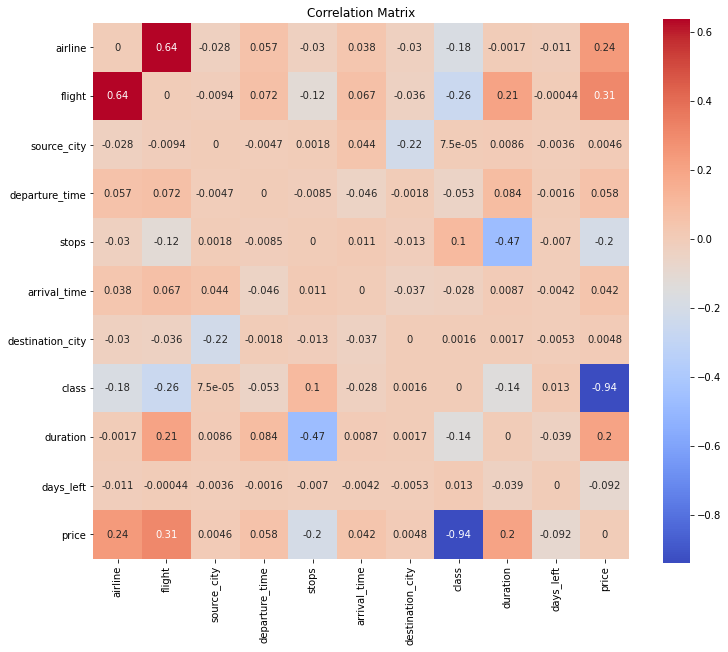

flight              0.305872
airline             0.243358
duration            0.204222
departure_time      0.058319
arrival_time        0.042043
destination_city    0.004795
source_city         0.004594
days_left          -0.091949
stops              -0.202620
class              -0.937860
dtype: float64


In [ ]:
df_encoded = data.copy()

# Apply label encoding
for column in ['airline', 'flight', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']:
    labelencoder = LabelEncoder()
    df_encoded[column] = labelencoder.fit_transform(df_encoded[column])

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Remove self-correlations
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0.0

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

correlations = df_encoded.drop('price', axis=1).corrwith(df_encoded['price']).sort_values(ascending=False)
print(correlations)


The data demonstrates the correlation between each variable and price. The closer the value of a variable is to +1 or -1, the stronger the linear relationship between it and price. A value close to 0 indicates a weak relationship. Here I will give some interpretation of the results

1. **flight (0.306)**: there is a moderate positive correlation, which means that there is a positive correlation between the flight number and the price, i.e. some specific flights may have a higher price.

2. **airline (0.243)**: there is a weak positive correlation, which means that different airlines may have some influence on the price, i.e. some airlines may have higher fares.

3. **duration (0.204)**: indicates that there is a positive correlation between flight duration and price, usually the longer the flight duration, the higher the price may be.

4. **departure_time (0.058) and arrival_time (0.042)**: these two have a very weak correlation with the price, indicating that the departure and arrival times do not have much effect on the price.

5. **destination_city (0.005) and source_city (0.005)**: the correlation between these two and price is very weak, almost negligible, indicating that departure and destination cities have little effect on price.

6. **days_left (-0.092)**: this has a negative correlation with price, indicating that the closer the departure date is, the higher the price is likely to be.

7. **stops (-0.203)**: this is moderately negatively correlated with price, indicating that stops on the flight may reduce the price of the ticket.

8. **class (-0.938)**: this is strongly negatively correlated with price, probably because when coding the class, the "Economy" class may be coded as 0 and the "Business" class as 1, and then the price may be higher in the "Economy" class (which may actually reflect some kind of error in the data, as we usually expect the price of (this may actually reflect some error in the data, as we would normally expect prices to be higher in Business than Economy).

Note that this is just a preliminary correlation calculation, and we will refine this process further in subsequent data analysis!

# **Inferential Analysis(Hypothesis Testing)**

Since the objective of our resarch is to find if the interval between booking date and the departure date has a significant effect on the price of the ticket, we want to explore variables in the dataset that contirbute to forming conclusion to our hypothesis.

Because the data set we have contains a mixture of catagorical and numerical data, we used several hypothesis tests on the sample of the data to find the relation between 'price' with the rest of the variables.

#### Generating Sample

To get a sample, we used stratified sampling so that each characteristic(all varaibles besides price) is equally represented in the sample.



In [ ]:
samp = data.groupby(['airline', 'flight', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class','duration','days_left'],group_keys=False).apply(lambda x: x.sample(1))


In [ ]:
samp

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
119246,AirAsia,I5-1228,Bangalore,Afternoon,zero,Evening,Chennai,Economy,0.92,45,1603
119327,AirAsia,I5-1228,Bangalore,Afternoon,zero,Evening,Chennai,Economy,0.92,46,1603
119417,AirAsia,I5-1228,Bangalore,Afternoon,zero,Evening,Chennai,Economy,0.92,47,1603
119513,AirAsia,I5-1228,Bangalore,Afternoon,zero,Evening,Chennai,Economy,0.92,48,1603
119599,AirAsia,I5-1228,Bangalore,Afternoon,zero,Evening,Chennai,Economy,0.92,49,1603
...,...,...,...,...,...,...,...,...,...,...,...
68415,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,15.08,39,5949
69530,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,15.08,45,5949
234179,Vistara,UK-996,Mumbai,Evening,one,Night,Kolkata,Business,26.25,1,90157
234231,Vistara,UK-996,Mumbai,Evening,one,Night,Kolkata,Business,26.25,2,93069


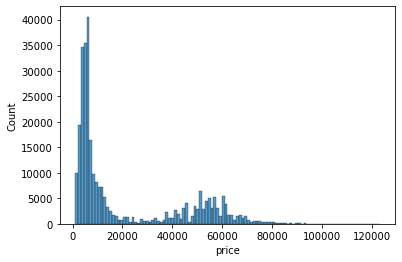

In [ ]:
fig = sns.histplot(samp['price'])

As the graph shows, the price of the sample is not normally distributed, hence we need to explore the data with nonparametric statistics.

#### Non-parametric Statistics Tests

The dependent variable in our study is price, while all the other variables are indepdent variables. Since price is a contineous data and the rest of the variables are either catagorical and numerical, we need to perform **Spearman's rank correlation** when the independent varaible is ordinal(ordered categories) or quantitative discrete; And perform **Kruskal Waillis test** if the independent variable is categorical.


First, we find the test staistic between price and all the other ordinal or discrete independent variables using Spearman's rank correlation:

In [ ]:
stat1,pvalue1 = stats.spearmanr(samp['price'],samp['class'])
stat2,pvalue2 = stats.spearmanr(samp['price'],samp['duration'])
stat3,pvalue3 = stats.spearmanr(samp['price'],samp['days_left'])
stat4,pvalue4 = stats.spearmanr(samp['price'],samp['stops'])
print("[class]: statistic =",stat1,"P-Value: %.4f" % float(pvalue1))
print("[duration]: statistic =",stat2,"P-Value: %.4f" % float(pvalue2))
print("[days_left]: statistic =",stat3, "P-Value: %.4f" % float(pvalue3))
print("[stops]: statistic =",stat4, "P-Value: %.4f" % float(pvalue4))


[class]: statistic = -0.8019987510977077 P-Value: 0.0000
[duration]: statistic = 0.3202324676262911 P-Value: 0.0000
[days_left]: statistic = -0.26755437514890146 P-Value: 0.0000
[stops]: statistic = -0.23433282431806457 P-Value: 0.0000


The correlation coefficiens above shows there is a **low positive correlation between price and the duration of the flight**, a **low correlation between price and number of stops**, and a **low negetive correlation between price and the purchasing interval**. Note that we get a strong negative correlation between price and class, this is because the business class is coded as '0' while the economy class is coded as '1'. We can still conclude that there is **a strong correlation between price and class.** The correlation values we found here is consistent with the results on the heatmap.

We then perform Kruskal–Wallis one-way analysis of variance if there are statistically significant differences between the groups of the categorical independent variables on the numerical dependent variable(price).


The **assumption of Kruskal-Wallis H test are**:
1. dependent variable should be measured at continuous level
2. independent variable should consist of two or more groups.
3. groups are independent
4. the distributions of each group have similar shape

The frist 3 conditions are met. However, we need to generate graphs to see if the fourth one is met as well.  If not we can only use the test to compare mean ranks of the groups within the variable.

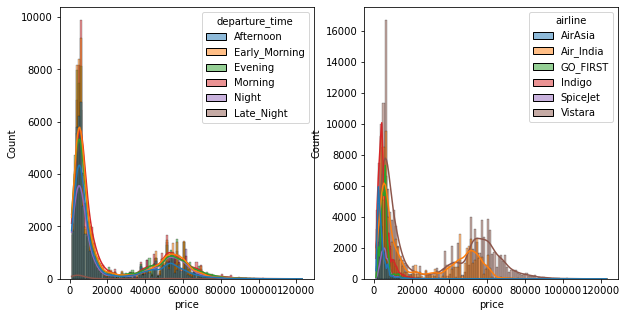

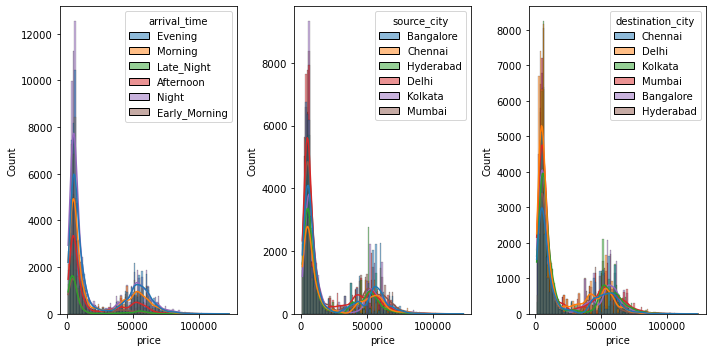

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=samp, x='price', hue='departure_time', kde=True,ax=axes[0])
sns.histplot(data=samp, x='price', hue='airline', kde=True,ax=axes[1])


fig, axes2 = plt.subplots(1, 3, figsize=(10, 5))
sns.histplot(data=samp, x='price', hue='arrival_time', kde=True,ax=axes2[0])
sns.histplot(data=samp, x='price', hue='source_city', kde=True,ax=axes2[1])
sns.histplot(data=samp, x='price', hue='destination_city', kde=True,ax=axes2[2])

plt.tight_layout()
plt.show()

Since the distribution of price for each group of the independent variable are similar, we can proceed to compare the medians of the dependent variable.

The **kruskal hypothesis** is:



- $H_0$: The median is equal across all groups.
- $H_1$: The median is not equal across all groups.`

In [ ]:
variable = ['airline','departure_time','arrival_time','destination_city','source_city','flight']
for var in variable:
    grouped_data = [samp[samp[var] == category]['price'] for category in samp[var].unique()]
    h_statistic, p_value =  stats.kruskal(*grouped_data)
    print("variable:",var," H-statistic:", h_statistic," P-value: %.4f"% float(pvalue2))


variable: airline  H-statistic: 94136.49790461431  P-value: 0.0000
variable: departure_time  H-statistic: 1845.458218341534  P-value: 0.0000
variable: arrival_time  H-statistic: 8936.78531935066  P-value: 0.0000
variable: destination_city  H-statistic: 1609.1732831338877  P-value: 0.0000
variable: source_city  H-statistic: 1796.3030751886472  P-value: 0.0000
variable: flight  H-statistic: 116743.48984181491  P-value: 0.0000


In our analysis, we used a significance level of 0.05 as a threshold for determining statistical significance, meaning that we are willing to accept a 5% chance of wrongly rejecting the null hypothesis, which states there is no effect or relationship.

1. **airline**:  The test statistic is 94134.74 and the corresponding p-value is 0.0000. Since this p-value is less than 0.05, we can reject the null hypothesis that the median price is the same for all ailine companies. We have sufficient evidence to conclude that the airline company leads to statistically significant differences in the price of flight.

2. **departure_time**:  The test statistic is 1844.63. The corresponding p-value is 0.0000. Since this p-value is less than 0.05, we can reject the null hypothesis that the median price is the same for all departure time. We have sufficient evidence to conclude that the departure time leads to statistically significant differences in the price of flight.

3. **arrival_time**:  The test statistic is 8935.51 and the corresponding p-value is 0.0000. Since this p-value is less than 0.05, we can reject the null hypothesis that the median price is the same for all arrival time. Hence, we conclude that arrival time leads to statistically significant differences in the price of flight.

4. **destination_city**:  The test statistic is 1609.56 and the corresponding p-value is 0.0000. Since this p-value is less than 0.05, we can reject the null hypothesis that the median price is the same for all destination cities. Hence, we conclude that destination cities leads to statistically significant differences in the price of flight.

5. **source_city**:  The test statistic is 1795.44 and the corresponding p-value is 0.0000. Since this p-value is less than 0.05, we can reject the null hypothesis that the median price is the same for all source cities. Hence, we conclude that source cities leads to statistically significant differences in the price of flight.

6. **flight**:  The test statistic is 116743.15 and the corresponding p-value is 0.0000. Since this p-value is less than 0.05, we can reject the null hypothesis that the median price is the same for all flights. Hence, we conclude that the type of flights can leads to statistically significant differences in the price of flight.


Overall, a sufficiently high H test statistic indicates that at least one difference between the medians of the groups within the variable is statistically significant. From the data above, we see that **Airline** and **Flight** have some of the highest H scores, which means the difference between the medians of the groups is not due to chance alone. Combining with the spearman rank correlation we did on the ordinal and discrete variables, we arrive at the conclusion that **Class, Airline, and Flight** have crucial impact on effecting the price of the flight ticket.

# Modeling

In [ ]:
base_model_df = data[['airline', 'class', 'flight', 'price']]


X = base_model_df.drop('price', axis=1)
y = base_model_df['price']

categorical = ['airline', 'class', 'flight']

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical),
    remainder="passthrough"
)


model = make_pipeline(
    preprocessor,
    Ridge()
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 4496.91
Mean Squared Error: 49780736.02
R^2 Score: 0.90


The Ridge Regression model has a high R² score of 0.90, which indicates that 90% of the variance in the flight prices can be explained by our predictors (airline, class, and flight).The Mean Absolute Error (MAE) of 4496.91 suggests that, on average, the model's predictions are approximately $4496.91 away from the actual prices, while the large Mean Squared Error (MSE) of 49780736.02 indicates the model is particularly sensitive to large errors due to the squaring in the MSE calculation. The next step would be to perform hyperparameter tuning to optimize the model's performance further, specifically adjusting the Ridge Regression alpha parameter to improve the balance between bias and variance.

### GridSearch with ridge Alpha

In [ ]:
# Define the grid of hyperparameters to search
param_grid = {
    'ridge__alpha': [0.1, 0.25, 0.5, 1.0, 2.5, 5.0, 10.0],
}

# Setup the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Check the best parameters
print("Best parameters: ", grid_search.best_params_)

# Check the best score (negative MSE because GridSearchCV maximizes the score)
print("Best score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

Best parameters:  {'ridge__alpha': 5.0}
Best score:  -50476776.52392791


In the grid search process, we defined a range of possible values for the hyperparameter 'alpha' in the Ridge regression model, which controls the strength of the regularization. The values tested were [0.1, 0.25, 0.5, 1.0, 2.5, 5.0, 10.0]. The grid search determined that the optimal 'alpha' parameter for the Ridge regression model was 5.0, achieving the best performance based on the negative mean squared error (MSE) scoring metric. The top score, corresponding to an MSE of approximately 50476776.52, denotes the average squared difference between predictions and actual values, making it the lowest MSE in our 5-fold cross-validation process using this 'alpha'.

In [ ]:
optimal_alpha = grid_search.best_params_['ridge__alpha']
model = make_pipeline(
    preprocessor,
    Ridge(alpha=optimal_alpha)
)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['airline', 'class',
                                                   'flight'])])),
                ('ridge', Ridge(alpha=5.0))])

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error: 4493.40
Mean Squared Error: 49781317.52
R^2 Score: 0.90


After tuning the alpha value to 5.0, our model's MAE slightly improved to about 4493.40 units. Even though the Mean Squared Error (MSE) remained almost the same, this shows that our model's average predictions are a tad closer to the actual prices than before. In both cases, our model was able to explain about 90% of the variations in flight prices. This means it was doing a pretty good job of catching the patterns in the data! So, what's next? Considering we have got a huge dataset of 300,153 rows, we want to give Random Forest Regression a shot.

### Random Forest Regression

In [ ]:
base_model_df = data[['airline', 'class', 'flight', 'price']]


X = base_model_df.drop('price', axis=1)
y = base_model_df['price']

categorical = ['airline', 'class', 'flight']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)])


rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=1000, max_depth=500))])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_pipeline.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 3887.517525659438
Mean Squared Error: 40960983.916089624
R^2 Score: 0.9205906199882823


The Random Forest Regressor model, with 1000 trees (`n_estimators`) and a maximum depth of 500 for each tree (`max_depth`), outperforms the previous Ridge regression model, as indicated by the lower Mean Absolute Error (MAE) and Mean Squared Error (MSE), and higher $R^2$ score. The model's MAE of approximately 3887.52 suggests that, on average, the model's predictions deviate from the actual values by around 3887.52 units, which is an improvement compared to the Ridge regression model's MAE. The higher $R^2$ score of 0.92 shows that this Random Forest Regressor model is able to explain approximately 92% of the variance in the target variable `price`, meaning it generally has stronger predictive power compared to the previous model. To conclude, the RandomForestRegressor model appears to provide better predictive performance for this dataset, likely due to its ability to capture complex, non-linear relationships between features and the target variable.

# **Conclusion & Discussion**

Our research aims to explore whether there was a significant relationship between the temporal gap between the booking date and the departure date and the price of flights. Our research hypothesis assumed later bookings (closer to the departure date) to be associated with higher prices, and the results align this assumption. The Kruskal-Wallis H test found that the p-values for the numerical variables are lower than 0.05, leading us to reject our null hypothesis which assumed the median price is the same across all groups.

Other variables also show significant influence over the ticket prices. Specifically, the airline company, flight type, and departure time showed substantial impacts on price variation, with significant p-values less than our threshold of 0.05. Such findings demonstrates the complexities of airfare pricing and suggests that it is influenced by a variety of factors rather than the timing of the booking alone.

Our analysis applied a Ridge Regression model which accounted for approximately 90% of the variance in flight prices. However, this model showed a large Mean Absolute Error (MAE) suggesting a potential limitation in its predictive power. Adjusting the Ridge Regression alpha parameter improved the model's performance slightly but not significantly.

Implications and Future Directions
These results provide implications for travelers and the flight  industry. They suggest that while timing may play a role in airfare costs, other factors such as the airline company, flight type, and departure time can have an even more significant impact on the price of a ticket.

In terms of future directions, we could seek to test our hypothesis with different models, such as the Random Forest Regressor which yielded superior performance compared to the initial Ridge Regression model. This model, applied with 1000 trees and a maximum depth of 500, outperformed the Ridge model with a lower MAE, lower MSE, and a higher R² score, accounting for approximately 92% of the variance in flight prices.

While this research provides insightful findings, we still have some potential limitations. The study only focused on six major metropolitan cities in India and used data from one booking platform. Therefore, results may not be applicable to other geographical regions or booking platforms. Additionally, other variables such as flight promotions, economic factors, or airline-specific policies were not considered, which could influence the ticket prices. Future work could consider these factors in the models to provide a more comprehensive understanding of airfare pricing dynamics.



## **Appendix: Team Expectations**

* Communicate openly and promptly to foster team collaboration.
* Show respect to all team members and be respectful to each person's idea and notion. Resolve conflicts through joint consultation of all members.
* Rigorously follow the project timeline and show up in the group ZOOM meetings on time.
* Document process, imporant information, and changes. Constantly improve and optimize.
* Every group member should be accountable for the project and aim for high quality work.

## **Appendix: Project Timeline Proposal**

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 7/23  |  8 PM | Read the project proposal guidline **(all)**; Read & Think about COGS 109 expectations **(all)** ;Brainstorm topics and hypotheisis **(all)**| Finalize the research topic and hypotheisis; Disucss the relevant works
| 7/25  |  8 PM | Finish project proposal **(all)**;| Discuss and finalize the project proposal; Conduct data cleaing and wragling|
| 7/26  |  2 PM  | Finish Data cleaning & Wragling **(Duye,Zirui)**| Discuss and finalize method for modeling and analysis
| 7/28  | 10 AM | Finish Data modeling and analysis **(Xinhao,Yuancheng)** | Share the analysis results and form conclusions
| 7/30  | 11 AM  | Draft results and conclusions **(Xinye,Zhexi)**| Work on writing the report
| 8/2  | 8 PM  | Complete the full project report **(all)** | Run a final check on each section of the report
| 8/3  | 2 PM  | Finalize the document **(all)** | Video filming and editing